In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset extracted.")

Dataset extracted.


In [27]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [29]:
with_mask_files = os.listdir('/content/data/with_mask')

In [30]:
with_mask_files[0:5]

['with_mask_1330.jpg',
 'with_mask_2523.jpg',
 'with_mask_2071.jpg',
 'with_mask_815.jpg',
 'with_mask_2029.jpg']

In [31]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_163.jpg', 'without_mask_2397.jpg', 'without_mask_2528.jpg', 'without_mask_2414.jpg', 'without_mask_1210.jpg']


In [32]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


Creating Labels

In [33]:
with_mask = [1]*3725
without_mask = [0]*3828

In [34]:
labels = with_mask + without_mask
print(len(labels))

7553


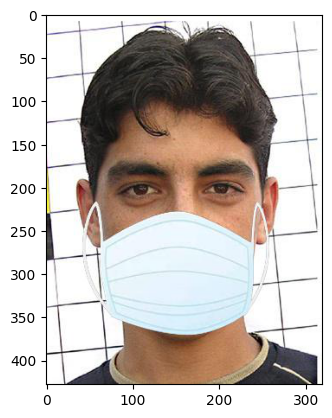

In [35]:
img = mpimg.imread('/content/data/with_mask/with_mask_1330.jpg')
plt.imshow(img)

# Image Processing

In [36]:
with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  img = Image.open(with_mask_path + str(img_file))
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [37]:
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  img = Image.open(without_mask_path + str(img_file))
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

In [38]:
len(data)

7553

In [39]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [169, 168, 169],
        [255, 255, 255],
        [255, 251, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [164, 163, 164],
        [255, 255, 255],
        [254, 253, 252]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [162, 163, 163],
        [255, 255, 255],
        [253, 255, 249]]

In [40]:
type(data[0])

numpy.ndarray

In [41]:
X = np.array(data)
Y = np.array(labels)

In [42]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [45]:
X_train = X_train/255
X_test = X_test/255

# Building a Convolutional Neural Network (CNN)

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))   # Convolutional Layer
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation = 'sigmoid'))

In [48]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
history = model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
189/189 [==============================] - 14s 18ms/step - loss: 0.4682 - accuracy: 0.7959
Epoch 2/5
189/189 [==============================] - 3s 17ms/step - loss: 0.2781 - accuracy: 0.8886
Epoch 3/5
189/189 [==============================] - 3s 16ms/step - loss: 0.2295 - accuracy: 0.9108
Epoch 4/5
189/189 [==============================] - 3s 16ms/step - loss: 0.1824 - accuracy: 0.9293
Epoch 5/5
189/189 [==============================] - 3s 17ms/step - loss: 0.1515 - accuracy: 0.9404


In [50]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.1899 - accuracy: 0.9312
0.9311714172363281


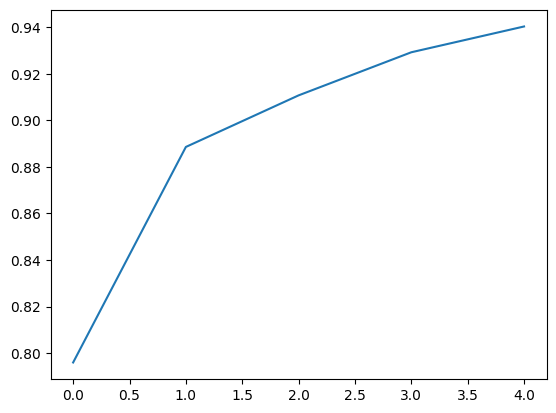

In [51]:
plt.plot(history.history['accuracy'])
plt.show()

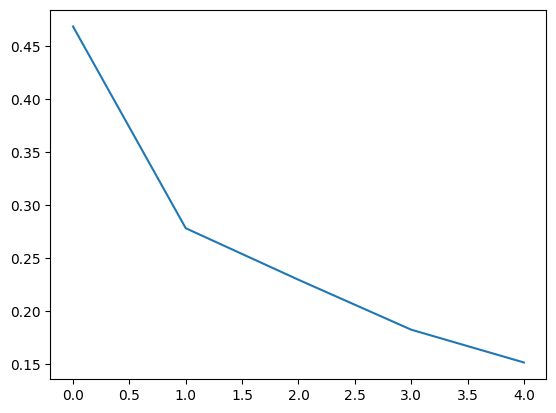

In [52]:
plt.plot(history.history['loss'])
plt.show()

# Predictive System

Enter path of image: /content/download.jpeg


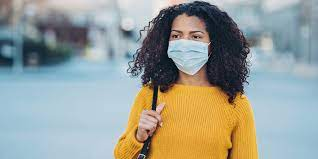

1/1 [==============================] - 0s 171ms/step
[[0.06985868 0.9777234 ]]
1
Mask detected.


In [54]:
input_image_path = input("Enter path of image: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
resized_img = cv2.resize(input_image, (128,128))
scaled_img = resized_img/255
reshaped_img = np.reshape(scaled_img, [1,128,128,3])
pred = model.predict(reshaped_img)
print(pred)
label = np.argmax(pred)
print(label)
if(label == 1):
  print("Mask detected.")
else:
  print("Mask not detected.")